# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [2]:
df.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,4283.000000,1283.000000,1283.000000,4568.000000,1647.000000,1283.00000,1283.000000,2378.000000,1283.000000,6192.000000,8169.000000
mean,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.416680,2.335026,2.056709,2.42650,2.101949,2.640959,3.826968,16.605386,1.472407
std,8.025121,7.655847,7.166643,8.903134,6.650012,9.425358,6.502917,8.938863,6.347652,6.117967,7.23414,6.377879,7.161416,9.591337,7.458951,0.616259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.650000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.350000,1.300000
75%,1.200000,0.600000,1.200000,1.400000,0.800000,1.200000,1.000000,2.200000,0.800000,0.600000,0.70000,0.400000,1.200000,2.400000,22.700000,1.690000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,63.000000,114.400000,102.200000,75.000000,123.20000,95.600000,77.400000,103.600000,34.900000,6.750000


In [3]:
ts=pd.DataFrame()
ts['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')
ts['Hyd']=df['Hydrometry_Nave_di_Rosano']
ts.index=ts['Date']
ts.drop(columns='Date',axis=1,inplace=True)

ts

,Hyd
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [4]:
ts.isnull().sum()

Hyd    48
dtype: int64

In [5]:
ts.interpolate(method='linear',inplace=True )
ts.isnull().sum()

Hyd    0
dtype: int64

In [6]:
!pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.0 MB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


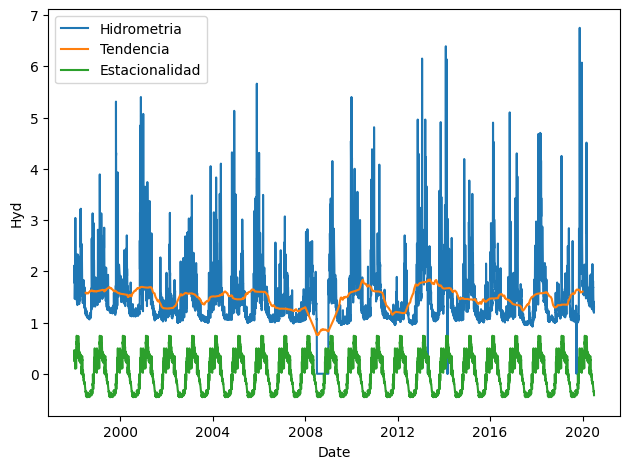

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts,period=365)
trend = decomp.trend
seasonal = decomp.seasonal

sns.lineplot(data=ts, x=ts.index ,y='Hyd', label="Hidrometria")
sns.lineplot(data=trend, label="Tendencia")
sns.lineplot(data=seasonal, label="Estacionalidad")
plt.tight_layout()
plt.show()  

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -7.825536e+00
p-value                        6.496928e-12
#Lags Used                     3.700000e+01
Number of Observations Used    8.179000e+03
Critical Value (1%)           -3.431150e+00
Critical Value (5%)           -2.861893e+00
Critical Value (10%)          -2.566958e+00
dtype: float64

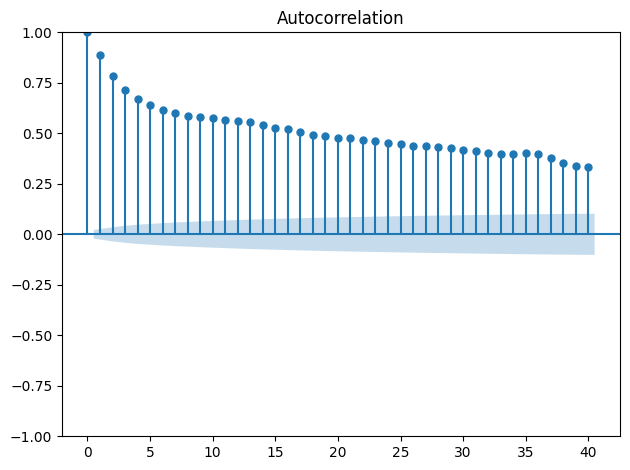

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)
plt.tight_layout()
plt.show()

In [12]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal=True, m=3, trace=True)

/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=2130.301, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=2914.101, Time=0.16 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=2816.290, Time=0.42 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=2796.251, Time=0.51 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3]             : AIC=2912.102, Time=0.21 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=2110.519, Time=2.87 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=2108.485, Time=1.64 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=2110.520, Time=2.26 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=2106.713, Time=1.14 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3] intercept   : AIC=2108.278, Time=1.66 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3] intercept   : AIC=2108.278, Time=2.09 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3] intercept   : AIC=2110.378, Time=2.15 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[3] intercept   : AIC=2534.854, Time=0.57 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=2247.525, Time=1.05 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3] intercept   : AIC=2912.583, Time=0.34 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=2112.645, Time=1.02 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3]             : AIC=2104.717, Time=0.49 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3]             : AIC=2106.282, Time=0.66 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3]             : AIC=2106.282, Time=0.75 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3]             : AIC=2108.389, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[3]             : AIC=2532.856, Time=0.21 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3]             : AIC=2245.530, Time=0.33 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3]             : AIC=2106.488, Time=0.50 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3]             : AIC=2910.583, Time=0.31 sec


/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3]             : AIC=2110.649, Time=0.41 sec

Best model:  ARIMA(1,1,2)(0,0,0)[3]          
Total fit time: 25.710 seconds


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8217
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1048.359
Date:                Sun, 24 Aug 2025   AIC                           2104.717
Time:                        13:07:40   BIC                           2132.773
Sample:                    01-01-1998   HQIC                          2114.308
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6222      0.010     64.259      0.000       0.603       0.641
ma.L1         -0.7225      0.009    -78.190      0.000      -0.741      -0.704
ma.L2         -0.1780      0.006    -32.090      0.000      -0.189      -0.167
sigma2         0.0756      0.000    297.728      0.000       0.075       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            673373.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             4.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
forcast = model.predict(n_periods=365)
forcast

/opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2020-07-01    1.348385
2020-07-02    1.366374
2020-07-03    1.377566
2020-07-04    1.384529
2020-07-05    1.388861
                ...   
2021-06-26    1.395995
2021-06-27    1.395995
2021-06-28    1.395995
2021-06-29    1.395995
2021-06-30    1.395995
Freq: D, Length: 365, dtype: float64

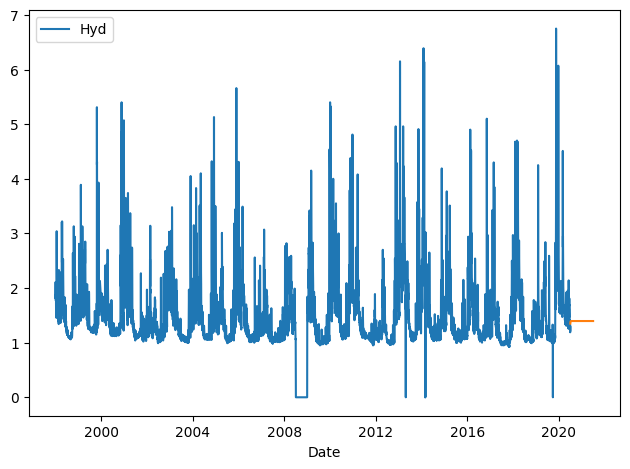

In [19]:
sns.lineplot(data=ts)
sns.lineplot(data=forcast)
plt.tight_layout()
plt.show()

In [20]:
!pip install neuralprophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached markdown-3.8.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 35.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 39.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 37.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.1 MB/s eta 0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached absl_py-2

In [37]:
ts_np = ts.reset_index()

ts_np

,Date,Hyd
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [43]:
ts_np.rename(columns={'Date':'ds','Hyd':'y'},inplace=True)
ts_np

,ds,y
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [42]:
from neuralprophet import NeuralProphet

m = NeuralProphet()

metrics = m.fit(ts_np, freq="D")

future= m.make_future_dataframe(ts_np, periods=365)

forecast = m.predict(future)
forecast

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - /o

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (129) is too small than the required number                     for the learning rate finder (247). The results might not be optimal.


Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/ent_con_arima/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency -

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2020-07-01,None,1.091941,1.416083,-0.323560,-0.000582
1,2020-07-02,None,1.093746,1.416050,-0.328800,0.006495
2,2020-07-03,None,1.094184,1.416017,-0.333782,0.011949
3,2020-07-04,None,1.076739,1.415984,-0.338570,-0.000675
4,2020-07-05,None,1.046159,1.415951,-0.343143,-0.026649
...,...,...,...,...,...,...
360,2021-06-26,None,1.111414,1.404225,-0.292106,-0.000705
361,2021-06-27,None,1.078861,1.404192,-0.298668,-0.026663
362,2021-06-28,None,1.094828,1.404159,-0.304937,-0.004394
363,2021-06-29,None,1.107059,1.404126,-0.310961,0.013894


<Axes: xlabel='Date', ylabel='yhat1'>

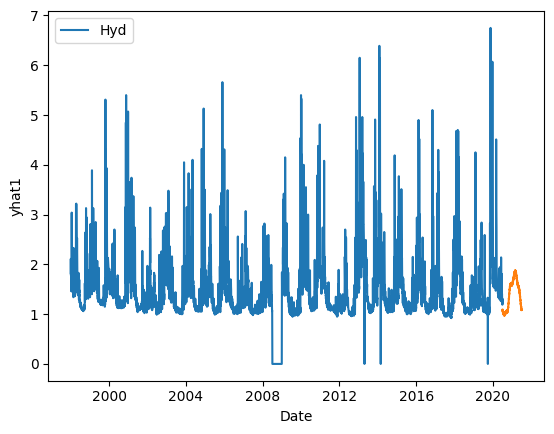

In [48]:
sns.lineplot(data=ts)
sns.lineplot(data=forecast, x='ds', y='yhat1')